# Lindley's Paradox

To ilustrate the paradox we are going to consider the Laplace's problem of estimating the probability of a male birth.

Suppose that a total of 48,870 girls and 49,581 boys were born. Let be $\theta$ the **probability of a male birth** and $Y|\theta$ the observed male births. As Laplace, we are going to consider a uniform prior for $\theta$. The model is then $$\theta\sim \textsf{Uniform}(0,1)$$ and $$Y|\theta\sim\textsf{Binomial}(n,\theta),$$ where $n$ is the total number of births.

In [1]:
import numpy as np
from scipy.stats import norm, binom

import matplotlib.pyplot as plt

In [2]:
fem_births = 48870
mal_births = 49581
births = fem_births + mal_births

We get a simple estimate for $\theta$ as the observed proportion of male births.

In [3]:
theta_hat = mal_births/births
theta_hat 

0.5036109333577109

To ilustrate Lindley's Paradox we are going to perform the next hypothesis testing $H_0:\theta=0.5$.

First, we are going to estimate the frecuentist p-value. Since we have large data, we can approximate the distribution of $Y|\theta$ by a normal distribution $$Y\overset{\cdot}{\sim}\textsf{N}(\mu,\sigma^2),$$ with $\mu=n\theta$ and $\sigma^2=n\theta(1-\theta)$.

In [4]:
theta0 = 0.5
mu = births * theta0
sigma_2 = births * theta0 * (1-theta0)

In [5]:
# p-value for a double side hypothesis test
2 * norm.sf(mal_births, mu, np.sqrt(sigma_2))

0.023451501665971836

In [6]:
# p-value for a double side hypothesis test considering the exact distribution of Y
2 * binom.sf(mal_births, births, theta0)

0.023256586093285063

That is, from a frecuentist perspective **we reject the hypothesis $H_0: \theta=0.5$.**

To get a better insight of why, we are rejecting $H_0$, let's calculate the best estimate for $\theta$ under $H_0$, and plot the density distribution for $Y$ under $H_0$.

In [7]:
births*theta0

49225.5

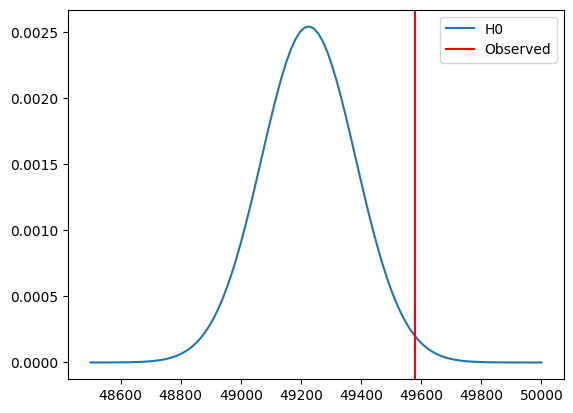

In [8]:
birth_vect = np.linspace(48500, 50000, 100)

plt.plot(birth_vect, norm.pdf(birth_vect, mu, np.sqrt(sigma_2)), label='H0')
plt.axvline(mal_births, color='r', label='Observed')
plt.legend()

It's clear that the distribution of the data under $H_0$ cannot explain the observed number of male births, thus we reject $H_0$.

Now, let be $H_1: \theta\neq 0.5$. From a Bayesian point of view, we need to calculate the posterior probability of $H_0$, which (using Bayes' theorem and total probability law) can be calculated as

$$P(H_0|Y)=\frac{P(Y|H_0)P(H_0)}{P(Y|H_0)P(H_0)+P(Y|H_1)P(H_1)}.$$

We can consider prior probabilities $P(H_0)=P(H_1)=0.5$.

Furthermore, $P(Y|H_0)$ and $P(Y|H_1)$ can be calculated as

$\begin{aligned}
P(Y|H_0)&=\binom nY \theta_0^Y (1-\theta_0)^{n-Y} \\
P(Y|H_1)&=\int\limits_0^1 \binom nY \theta^Y (1-\theta)^{n-Y}d\theta=\binom nY B(k+1, n-k+1)=1/(n+1),
\end{aligned}$

where $\theta_0=0.5$.

In [9]:
p_y_H0 = binom.pmf(mal_births, births, theta0)
p_y_H1 = 1/(births+1)

p_H0_y = p_y_H0 / (p_y_H0 + p_y_H1)

p_H0_y

0.9505229569718407

Thus, from a Bayesian perspective **we do not reject the hypothesis $H_0$.** Furthermore, the posterior probability of $H_0$ is huge!

### What has happened!?

The next explanation was taken from Wikipedia.

The apparent disagreement between the two approaches is caused by a combination of factors. First, **the frequentist approach above tests $H _0$ without reference to $H_1$.** The Bayesian approach evaluates $H_0$ as an **alternative** to $H_1$, and finds the first to be in better agreement with the observations. This is because the latter hypothesis is much more diffuse, as $\theta$ can be anywhere in $[0,1]$ (except 0.5 [which has measured zero]), which results in it having a very low posterior probability. To understand why, it is helpful to consider the two hypotheses as generators of the observations:

- Under $H_0$, we choose $\theta=0.5$, and ask how likely it is to see 49,581 boys in 98,451 births.
- Under $H_1$, we choose $\theta$ randomly from anywhere within 0 to 1, and ask the same question.

Most of the possible values for $\theta$ under $H_1$ are very poorly supported by the observations. In essence, the apparent disagreement between the methods is not a disagreement at all, but rather two different statements about how the hypotheses relate to the data:

- The frequentist finds that $H_0$ is a poor explanation for the observation.
- The Bayesian finds that $H_0$ is a far better explanation for the observation than $H_1$.

The ratio of the sex of newborns is improbably 50/50 male/female, according to the frequentist test. Yet 50/50 is a better approximation than most, but not all, other ratios. The hypothesis $\theta=0.504$ would have fit the observation much better than almost all other ratios, including $\theta=0.5$.

Thus, if we replace $H_1$  with $H_2:\theta=\hat\theta$, i.e., the maximum likelihood estimate for $\theta$, the posterior probability of $H_0$ would be only 0.07 compared to 0.93 for $H_2$ (of course, one cannot actually use the MLE as part of a prior distribution).

In [10]:
p_y_H0 = binom.pmf(mal_births, births, theta0)
p_y_H2 = binom.pmf(mal_births, births, theta_hat)

p_H0_y = p_y_H0 / (p_y_H0+ p_y_H2)

p_H0_y

0.07126646849013898

In [11]:
p_H2_y = p_y_H2 / (p_y_H0+ p_y_H2)

p_H2_y

0.928733531509861

## Another example

Suppose we observe $y=1$ from the model $y\sim\textsf{N}(\theta,1)$ with a uniform prior density on $\theta$, thus $\theta|y\sim\textsf{N}(y,1)$. And consider the hypothesis $H_0:\theta=0$.

In [12]:
# p-value for a double side hypothesis test
print(2*norm.sf(1, 0, 1))

# posterior probability of the hypothesis
print(norm.sf(0, 1, 1))

0.31731050786291415
0.8413447460685429


In order for a Bayesian analysis to yield a nonzero probability for a point null hypothesis, it must begin with a nonzero prior probability for that hypothesis; in the case of a continuous parameter, such a prior distribution (comprising a discrete mass, of say 0.5, at $\theta_0$ mixed with a continuous density elsewhere) usually seems contrived. In fact, most of the difficulties in interpreting hypothesis tests arise from the artificial dichotomy that is required between $\theta=\theta_0$ and $\theta\neq\theta_0$. Difficulties related to this dichotomy are widely acknowledged from **all perspectives** on statistical inference. In problems involving a continuous parameter $\theta$ (say the difference between two means), the hypothesis that $\theta$ is exactly zero is rarely reasonable, and it is of more interest to estimate a posterior distribution or a corresponding interval estimate of $\theta$ or the posterior probability that $\theta>\theta_0$, which is a more satisfactory and informative conclusion than the dichotomous verdict ‘reject’ or ‘do not reject.’